# Ableitung mehrere Variablen

## Übungsblatt

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Aufgabe 1: Partielle Ableitungen berechnen

Hier geht es um die Funktion $f(x,y) = x^2  - 2y^2$.

#### a) Von Hand

Berechne von Hand die beiden partiellen Ableitungen $f_x(x,y)$ und $f_y(x,y)$ und werte beide an der Stelle $(x,y)=(1,3)$ aus.

$$
\begin{align*}
    f_x(x,y) &= 2x \,,&
    f_x(1,3) &= 2 \cdot 1 = 2\\
    f_y(x,y) &= -4y \,,&
    f_y(1,3) &= -4 \cdot 3 = -12
\end{align*}
$$

#### b) Numerisch

Berechne die beiden partiellen Ableitungen an der Stelle $(1,3)$ mithilfe der numerischen Approximation (siehe Vertiefung).

In [17]:
def f(x, y):
    return x**2 - 2 * y**2


x, y = 1, 3
h = 1e-6

f_x = (f(x + h, y) - f(x - h, y)) / (2 * h)
f_y = (f(x, y + h) - f(x, y - h)) / (2 * h)

print(f"f_x{(x, y)} = {f_x}")
print(f"f_y{(x, y)} = {f_y}")


f_x(1, 3) = 2.000000000279556
f_y(1, 3) = -12.000000001677336


### Aufgabe 2: Gradient numerisch berechnen

#### a) Implementierung

Implementiere eine Funktion `gradient_2d(f, x, y, h=1e-6)`, die den Gradienten der Funktion $f(x,y)$ an der Stelle $(x,y)$ berechnet. Die Funktion soll die beiden partiellen Ableitungen numerisch berechnen und den Gradienten NumPy Array zurückgeben.

In [18]:
def gradient_2d(f, x, y, h=1e-6):
    return np.array(
        [
            (f(x + h, y) - f(x - h, y)) / (2 * h),
            (f(x, y + h) - f(x, y - h)) / (2 * h),
        ]
    )


#### b) Test

Teste die Funktion mit der Funktion $f(x,y) = x^2  - 2y^2$ an der Stelle $(x,y)=(1,3)$ und vergleiche mit der analytischen Rechnung (von Hand).

In [19]:
gradient_2d(f, 1, 3)


array([  2., -12.])

#### c) Darstellung

Stelle den Gradienten der Funktion $f(x,y) = x^2  - 2y^2$ im Bereich $x \in [-2,2]$ und $y \in [-1.5,1.5]$ dar. Verwende

- `np.linspace` und `np.meshgrid` für das Erstellen der $x$- und $y$-Gitterpunkte
- `gradient_2d` für das Berechnen des Gradienten an den Gitterpunkten
- `plt.quiver` für das Darstellen des Gradienten als Pfeile

**Option:** Ersetze `plt.quiver` durch `plt.streamplot`, um den Gradienten als Stömungsfeld zu visualisieren.

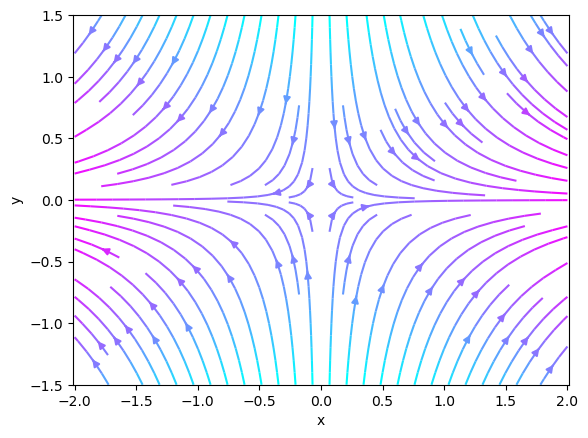

In [20]:
n = 21
x = np.linspace(-2, 2, n)
y = np.linspace(-1.5, 1.5, n)
X, Y = np.meshgrid(x, y)
gradx, grady = gradient_2d(f, X, Y)
Z = f(X, Y)

# plt.quiver(X, Y, gradx, grady, Z, cmap="cool")
plt.streamplot(X, Y, gradx, grady, color=Z, cmap="cool")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Aufgabe 3: Höhenlinien und Gradient zusammen darstellen

Gegeben sei die Funktion

$$ g(x,y) = y \cdot e^{-x^2} $$

1. Stelle die Höhenlinien im Bereich $x, y \in [-2,2]$ dar.
2. Zeichne zusätzlich den Gradienten ein.

Hierfür solltest du folgende Funktion verwernden:
- [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
- [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
- [`np.gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)
- [`plt.contourf`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)
- [`plt.quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

Wenn du weniger Punkte für die `np.linspace` verwendest, dann bekommst du auch weniger Gradienten-Pfeile und sie werden etwas länger (und somit grösser) dargestellt. Probiere es aus.

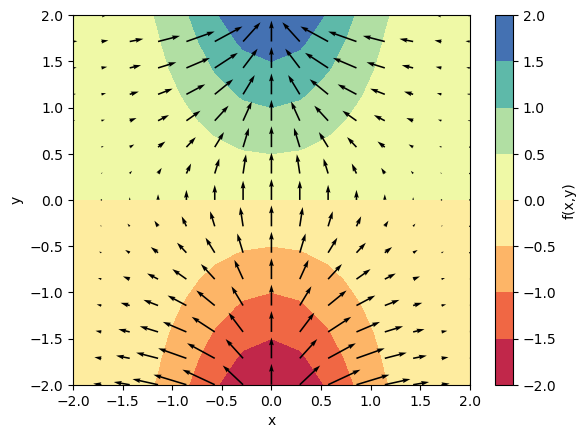

In [21]:
n = 15
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 2, n)
X, Y = np.meshgrid(x, y)

Z = Y * np.exp(-(X**2))
grady, gradx = np.gradient(Z, y, x)

plt.contourf(X, Y, Z, cmap="Spectral")
plt.colorbar(label="f(x,y)")
plt.quiver(X, Y, gradx, grady, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### Aufgabe 4: Gradientenverfahren in 2D

Hier ist die Implementation des Gradientenverfahrens aus der Vertiefung:

In [22]:
def gradient_descent_2d(grad_f, x0, y0, alpha, tol, max_steps):
    x, y = x0, y0
    grad = grad_f(x, y)
    err = np.inf
    res = [(x, y, err)]
    while len(res) < max_steps and err > tol:
        grad = grad_f(x, y)
        x = x - alpha * grad[0]
        y = y - alpha * grad[1]
        err = np.sqrt(np.sum(grad**2))
        res.append((x, y, err))
    return res


Nun soll das Minimum der folgenden Funktion bestimmt werden:

$$ f(x,y) = x^4 + \frac{1}{2}y^4 - 2x^2 - 3y^2 + x(y-1) + 10 $$


1. Bestimme den Gradienten der Funktion analytisch. Dazu darfst du auch [Wolfram Alpha](https://www.wolframalpha.com/) verwenden.
2. Stelle die Höhenlinien im Bereich $x \in [-2,2]$ und $y \in [-3,3]$ dar (analog zur Vertiefung - Copy-Paste ist erwünscht).
4. Nutze die Funktion `gradient_descent_2d` um das Minimum (bzw. eines der Minima) zu finden.
5. Visualiere den Verlauf des Gradientenverfahrens (analog zur Vertiefung - Copy-Paste ist erwüsncht)
6. Experimentiere mit verschiedenen Startwerten und Lernraten.

**Tipp:** Mithilfe von [Wolfram|Alpha](https://www.wolframalpha.com/) kannst du zum Vergleich das Minimum der Funktion auch bestimmen (*minimize ...*).

**Optional:** Stelle den Gradienten der Funktion auch noch dar.

In [23]:
def f(x, y):
    return x**4 + y**4 / 2 - 2 * x**2 - 3 * y**2 + x * (y - 1) + 10


def grad_f(x, y):
    return np.array(
        [
            4 * x**3 - 4 * x + y - 1,
            2 * y**3 - 6 * y + x,
        ]
    )


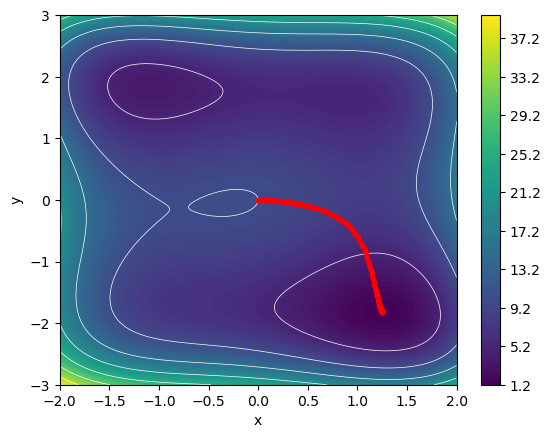

In [24]:
# Daten für Dartellung Höhenlinien und theoretisches Minimum
n = 200
x = np.linspace(-2, 2, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Parameter für Gradientenverfahren
x0 = 0
y0 = 0
alpha = 1e-2
tol = 1e-4
max_steps = 100

# Gradientenverfahren durchführen
res = gradient_descent_2d(grad_f, x0, y0, alpha, tol, max_steps)
xs, ys, _ = np.array(res).T

# Darstellung
plt.contourf(X, Y, Z, levels=100)
plt.colorbar()
plt.contour(X, Y, Z, colors="white", linewidths=0.5)
plt.plot(xs, ys, "r.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### Aufgabe 5: Gradientenverfahren in 1D (optional)

#### a) Wie funktioniert das Gradientenverfahren?

Schribe Schritt für Schritt auf, wie das Gradientenverfahren funktioniert und was die Rollen der Parameter sind.

**Antwort:**

Das Gradientenverfahren wird verwendet, um das Minimum einer Zielfunktion zu finden. Dabei wird der Gradient (steilster Anstieg) der Funktion an der aktuellen Stelle berechnet und dann die Variablen in entgegengesetzter Richtung des Gradienten verschoben.

1. Initialisiere die Variablen mit Startwerten `x0`.
2. Berechne den Gradienten der Funktion an der aktuellen Position der Variablen.
3. Aktualisiere die Variablen in die entgegengesetzte Richtung des Gradienten mit einem Schrittgrössenfaktor (`alpha`, Lernrate).
4. Wiederhole die Schritte 2 und 3 bis die Änderung der Zielfunktion kleiner ist als die Toleranz (`tol`) oder eine maximale Anzahl von Iterationen (`max_steps`) erreicht ist.

Um das Maximum einer Funktion zu finden, kann einfach in Richtung des Gradienten statt in die Gegenrichtung gewandert werden. Ansonsten ist der Ablauf der gleiche.

Es ist wichtig darauf hinzuweisen, dass das Gradientenverfahren nur dann garantiert das globale Extremum findet, wenn die Funktion konvex ist. In anderen Fällen kann es leider in einem lokalen Extremum steckenbleiben.

*Beschreibung der Parameter:*

Der Startwert `x0`, auch bekannt als Anfangswert oder Initialisierungswert, bezieht sich auf die Anfangswerte der Variablen, die der Algorithmus verwendet, um die Optimierung zu beginnen. Der Startwert hat grossen Einfluss darauf, wo der Algorithmus im Suchraum beginnt und kann daher auch Einfluss darauf haben, welches Minimum er findet. Ein geeigneter Startwert kann die Konvergenz des Algorithmus beschleunigen und das Risiko verringern, in ein lokales Minimum zu fallen.

Der Alpha-Wert, auch bekannt als Lernrate, bestimmt, wie schnell der Algorithmus sich durch den Suchraum bewegt. Ein kleiner Alpha-Wert führt zu kleinen Schritten und kann die Konvergenz des Algorithmus verlangsamen, während ein grosser Alpha-Wert zu grösseren Schritten und schnellerer Konvergenz führen kann. Andererseits besteht bei grossem Alpha das Risiko, das optimale Minimum zu überspringen. Ein geeigneter Alpha-Wert hängt von der spezifischen Anwendung und dem zugrunde liegenden Problem ab und muss in der Regel experimentell bestimmt werden.

#### b) Implementierung in 1D

Implementiere das Gradientenverfahren in 1D. Dazu kannst Du die Funktion `gradient_descent_2d` von oben als Vorlage nutzen. Nenne die neue Funktion `gradient_descent_1d`. Diese soll wieder eine Liste der Zwischenwerte und deren Fehlerabschätzung zurückgeben.

In [25]:
def gradient_descent_1d(grad_f, x0, alpha, tol, max_steps):
    x = x0
    grad = grad_f(x)
    err = np.inf
    res = [(x, err)]
    while len(res) < max_steps and err > tol:
        grad = grad_f(x)
        x = x - alpha * grad
        err = abs(grad)
        res.append((x, err))
    return res


#### c) Test

Teste die Implementierung mit der Funktion

$$ f(x) = x^2 - 6x $$

Probiere unterschiedliche Startwerte `x0` im Bereich von $[-10,10]$ und alpha Werte im Intervall $]0,1[$ aus. Beschreibe welchen Einfluss `x0` und `alpha` auf das Verhalten des Algorithmus haben.

Um den Verlauf des Gradientenverfahrens zu visualisieren, kannst Du z.B. die Faolge der $x$-Werte mit `plt.plot` oder `plt.stem` darstellen.

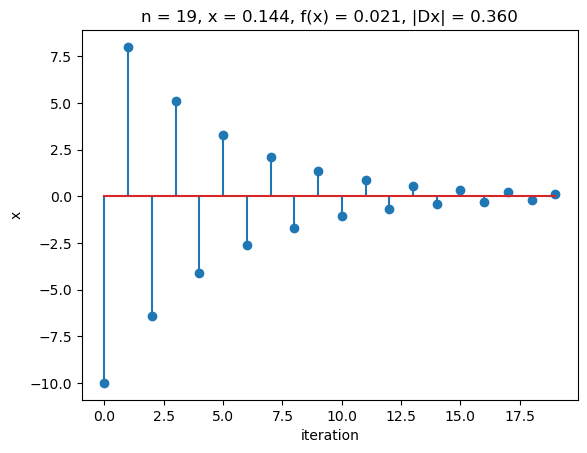

In [26]:
def f(x):
    return x**2 


def grad_f(x):
    return 2 * x


x0 = -10
alpha = 0.9
tol = 1e-4
max_steps = 20
res = gradient_descent_1d(grad_f, x0, alpha, tol, max_steps)

xs, errs = np.array(res).T
plt.stem(xs)
plt.xlabel("iteration")
plt.ylabel("x")
plt.title(f"n = {len(xs) - 1}, x = {xs[-1]:.3f}, f(x) = {f(xs[-1]):.3f}, |Dx| = {abs(errs[-1]):.3f}")
plt.show()


Eine spannende Darstellung könnte auch so aussehen. Hier sind `xs` die $x$-Werte aus dem Resultat des Gradientenverfahrens.

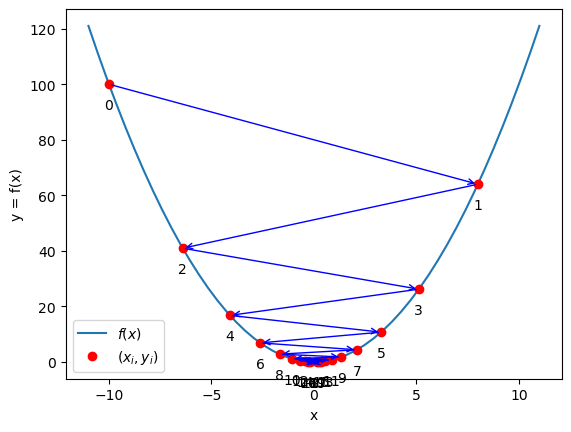

In [27]:
x = np.linspace(-11, 11)
y = f(x)
ys = f(xs)

fig, ax = plt.subplots()
ax.plot(x, y, label="$f(x)$")
ax.plot(xs, ys, "ro", label="$(x_i,y_i)$")
for i, (xi, yi) in enumerate(zip(xs, ys)):
    ax.text(xi, yi - 5, f"{i}", horizontalalignment="center", verticalalignment="top")
    if i > 0:
        ax.annotate(
            "",
            xy=(xi, yi),
            xycoords="data",
            xytext=(xs[i - 1], ys[i - 1]),
            textcoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="b"),
        )
ax.set_xlabel("x")
ax.set_ylabel("y = f(x)")
ax.legend()
plt.show()


#### d) Verfahren mehrmals durchführen und Resultate vergleichen

Nun soll das Gradientenverfahren mehrmals durchgeführt werden und die Resultate verglichen werden.

Dazu soll eine Liste von `x0`-Werten und eine Liste von unterschiedlichen `alpha`-Werten gegeben werden. Für jede Kombination soll das Gradientenverfahren ausgeführt und die Resultate in einem Subplot dargestellt werden.

Entscheide selbst, ob du die Darstellung des Verlaufs der x-Werte (mit `plt.stem`) oder die Darstellung der Punkte in der Zielfunktion (mit `plt.plot`) bevorzugst.

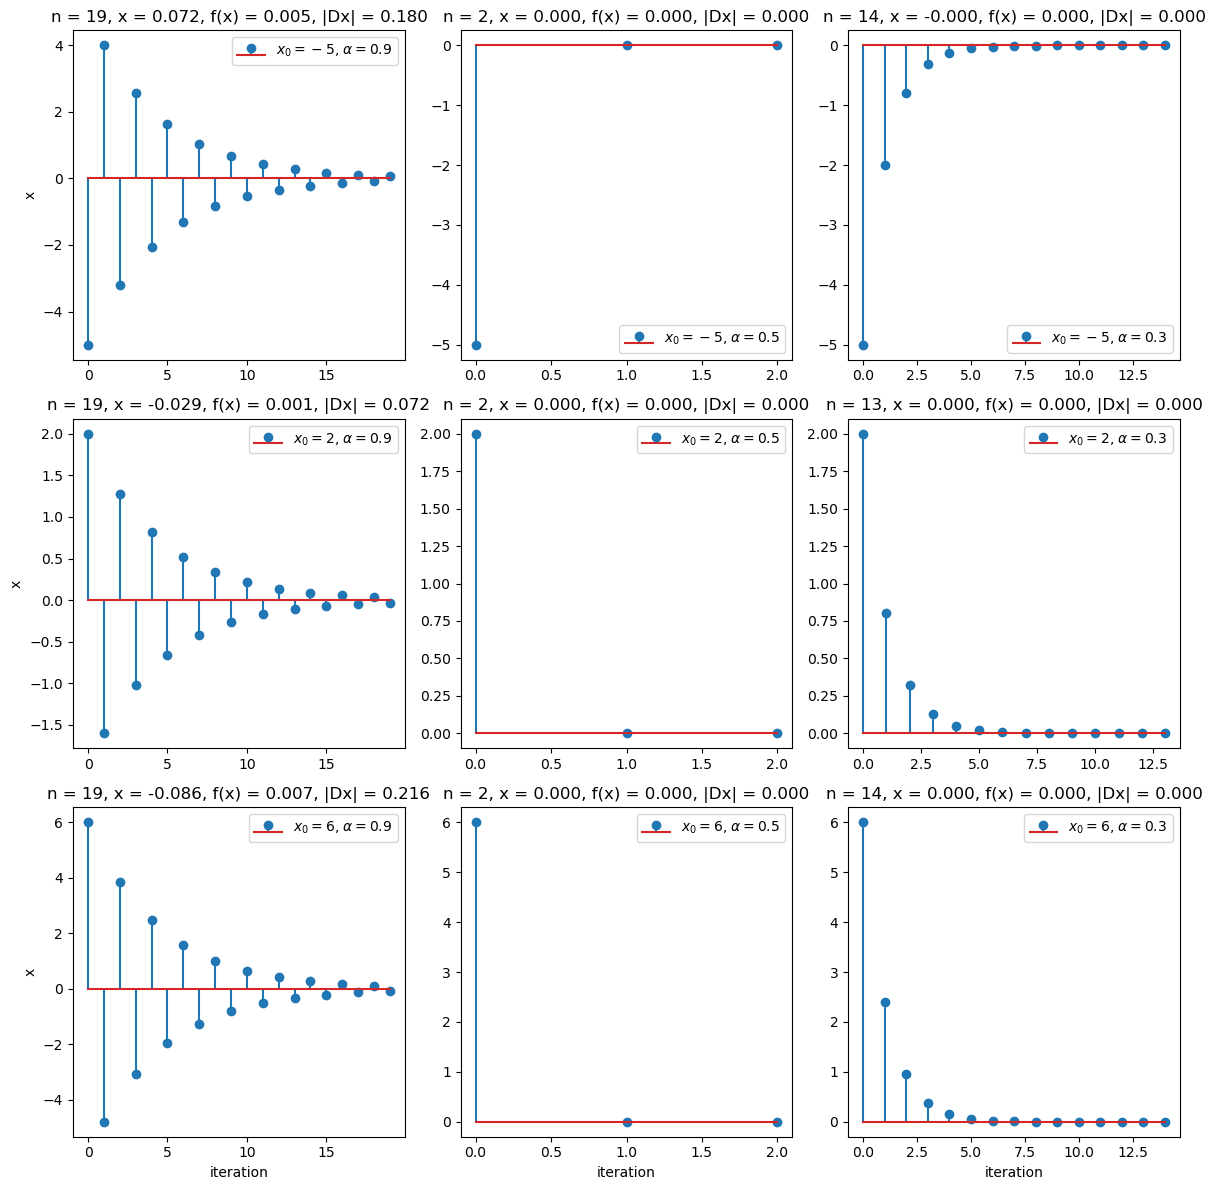

In [28]:
x0_list = [-5, 2, 6]
alpha_list = [0.9, 0.5, 0.3]

fig, axs = plt.subplots(len(x0_list), len(alpha_list), figsize=(12, 12))
for i, x0 in enumerate(x0_list):
    for j, alpha in enumerate(alpha_list):
        res = gradient_descent_1d(grad_f, x0, alpha, tol, max_steps)
        xs, errs = np.array(res).T
        ax = axs[i, j]
        ax.stem(xs, label=f"$x_0 = {x0}$, $\\alpha = {alpha}$")
        ax.legend()
        ax.set_title(f"n = {len(xs) - 1}, x = {xs[-1]:.3f}, f(x) = {f(xs[-1]):.3f}, |Dx| = {abs(errs[-1]):.3f}")
        if i == len(x0_list) - 1:
            ax.set_xlabel("iteration")
        if j == 0:
            ax.set_ylabel("x")
plt.tight_layout()
plt.show()


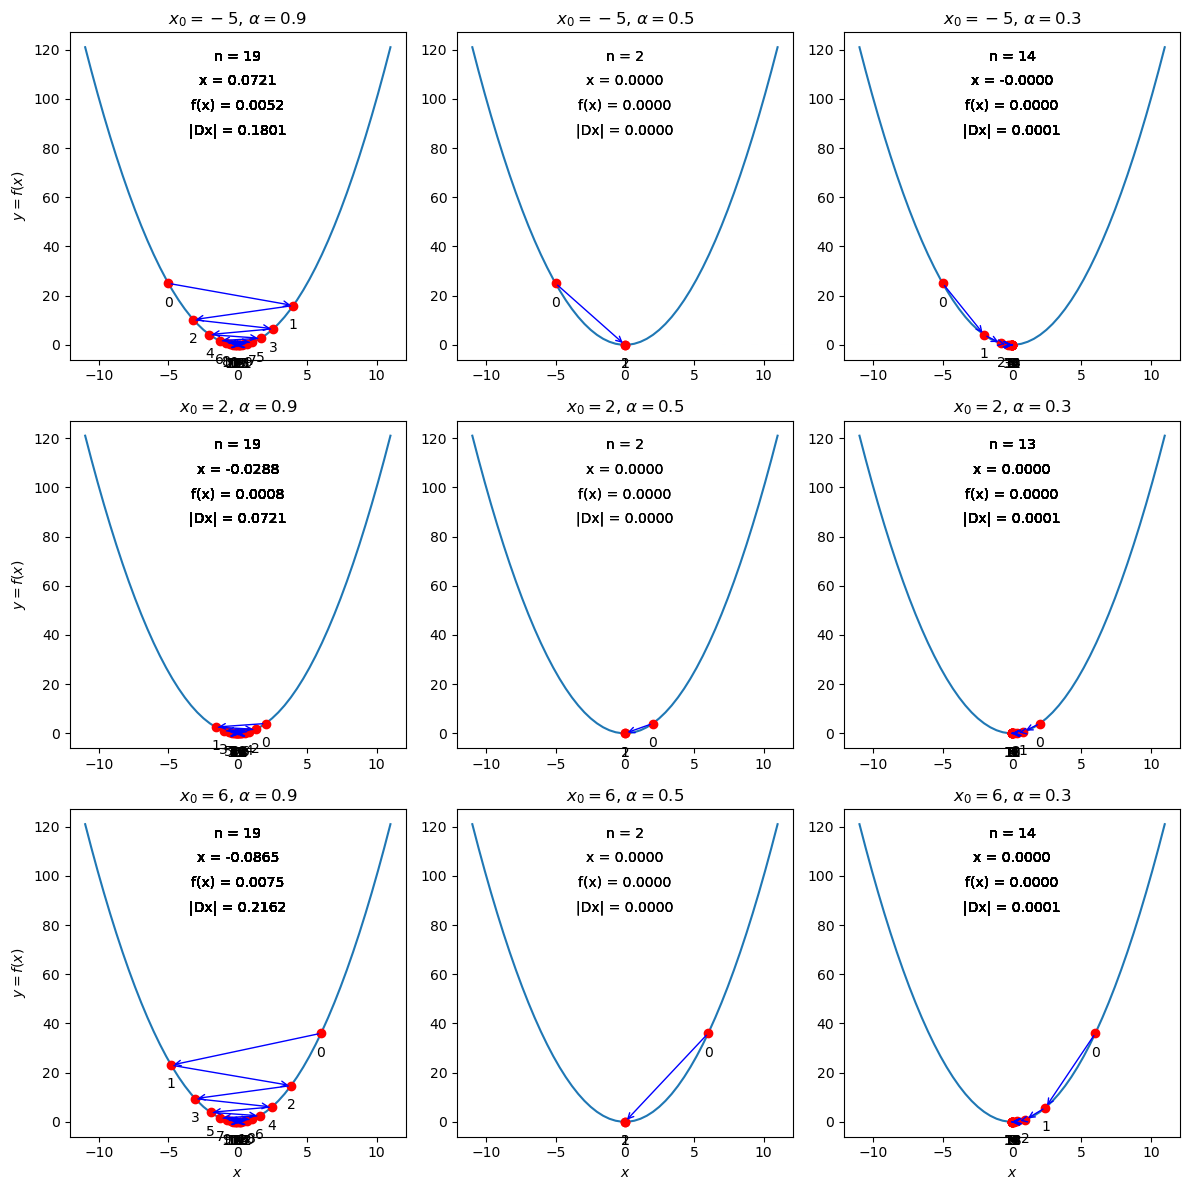

In [29]:
fig, axs = plt.subplots(len(x0_list), len(alpha_list), figsize=(12, 12))
for i, x0 in enumerate(x0_list):
    for j, alpha in enumerate(alpha_list):
        res = gradient_descent_1d(grad_f, x0, alpha, tol, max_steps)
        xs, errs = np.array(res).T
        ax = axs[i, j]
        ax.plot(x, y, label="$f(x)$")
        ys = f(xs)
        ax.plot(xs, ys, "ro", label="$(x_i,y_i)$")
        for k, (xi, yi) in enumerate(zip(xs, ys)):
            ax.text(xi, yi - 5, f"{k}", horizontalalignment="center", verticalalignment="top")
            ax.text(0, 120, f"n = {len(xs) - 1}", horizontalalignment="center", verticalalignment="top")
            ax.text(0, 110, f"x = {xs[-1]:.4f}", horizontalalignment="center", verticalalignment="top")
            ax.text(0, 100, f"f(x) = {f(xs[-1]):.4f}", horizontalalignment="center", verticalalignment="top")
            ax.text(0, 90, f"|Dx| = {abs(errs[-1]):.4f}", horizontalalignment="center", verticalalignment="top")
            if k > 0:
                ax.annotate(
                    "",
                    xy=(xi, yi),
                    xycoords="data",
                    xytext=(xs[k - 1], ys[k - 1]),
                    textcoords="data",
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="b"),
                )
        ax.set_title(f"$x_0 = {x0}$, $\\alpha = {alpha}$")
        if i == len(x0_list) - 1:
            ax.set_xlabel("$x$")
        if j == 0:
            ax.set_ylabel("$y = f(x)$")
plt.tight_layout()
plt.show()
